In [3]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [4]:
# Ensure the first cell is executed before running this cell

# Load datasets
matches = pd.read_csv('matchinfo.csv')
deliveries = pd.read_csv('all_matches.csv')



In [5]:
# grouping the 1st innings,2nd innings score in a particular matchid
# lets say match id = 1,so inning 1 score = 207,inning 2 score = 172

totalrun_df=deliveries.groupby(['match_id','innings']).sum()['total-runs'].reset_index()

totalrun_df

,match_id,innings,total-runs
0,1252666,1,145
1,1252666,2,136
2,1252667,1,144
3,1252667,2,148
4,1252668,1,126
...,...,...,...
259,1417822,2,126
260,1417822,3,7
261,1417822,4,11
262,1417823,1,147


In [6]:
totalrun_df = totalrun_df[totalrun_df['innings']==1]
totalrun_df['total_runs'] = totalrun_df['total-runs'].apply(lambda x:x+1)#to get target
totalrun_df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14176\2780990162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalrun_df['total_runs'] = totalrun_df['total-runs'].apply(lambda x:x+1)#to get target


,match_id,innings,total-runs,total_runs
0,1252666,1,145,146
2,1252667,1,144,145
4,1252668,1,126,127
6,1252669,1,173,174
8,1252671,1,87,88
...,...,...,...,...
252,1417819,1,181,182
254,1417820,1,150,151
256,1417821,1,41,42
258,1417822,1,126,127


In [7]:
match_df = matches.merge(totalrun_df[['match_id','total-runs']],
                       left_on='id',right_on='match_id')

match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,winner,winner_by_runs,...,venue,umpire 1,umpire 2,tv-umpire,no_result,tie,result,dl-applied,match_id,total-runs
0,1252666,2021,London,7/22/2021,Oval Invincibles,Manchester Originals,Manchester Originals,field,Oval Invincibles,9.0,...,"Kennington Oval, London",DJ Millns,MJ Saggers,NJ Llong,0,0,normal,0,1252666,145
1,1252667,2021,Birmingham,7/23/2021,London Spirit,Birmingham Phoenix,Birmingham Phoenix,field,Birmingham Phoenix,NaN,...,"Edgbaston, Birmingham",GD Lloyd,RT Robinson,NL Bainton,0,0,normal,0,1252667,144
2,1252668,2021,Nottingham,7/24/2021,Southern Brave,Trent Rockets,Southern Brave,bat,Trent Rockets,NaN,...,"Trent Bridge,Nottingham",DJ Millns,RJ Warren,RT Robinson,0,0,normal,0,1252668,126
3,1252669,2021,Leeds,7/24/2021,Welsh Fire,Northern Superchargers,Northern Superchargers,field,Welsh Fire,5.0,...,"Headingley, Leeds",NA Mallender,NJ Llong,MJ Saggers,0,0,normal,0,1252669,173
4,1252671,2021,Manchester,7/25/2021,Birmingham Phoenix,Manchester Originals,Birmingham Phoenix,bat,Manchester Originals,NaN,...,"Old Trafford, Manchester",AG Wharf,SJ O'Shaughnessy,NJ Llong,0,0,normal,0,1252671,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1417819,2024,Southampton,8/14/2024,Welsh Fire,Southern Brave,Welsh Fire,bat,NaN,NaN,...,"The Rose Bowl, Southampton",MJ Saggers,Rob White,NL Bainton,1,0,noresult,0,1417819,181
129,1417820,2024,Nottingham,8/14/2024,Oval Invincibles,Trent Rockets,Oval Invincibles,bat,Trent Rockets,NaN,...,"Trent Bridge,Nottingham",DJ Millns,ID Blackwell,NJ Llong,0,0,normal,0,1417820,150
130,1417821,2024,Birmingham,8/15/2024,Manchester Originals,Birmingham Phoenix,Birmingham Phoenix,field,Birmingham Phoenix,NaN,...,"Edgbaston, Birmingham",ID Blackwell,M Burns,PK Baldwin,0,0,normal,0,1417821,41
131,1417822,2024,London,8/17/2024,Southern Brave,Birmingham Phoenix,Birmingham Phoenix,field,NaN,NaN,...,"Kennington Oval, London",James Middlebrook,M Burns,NL Bainton,0,1,tie,0,1417822,126


In [8]:
match_df[match_df['dl-applied']==1].style.background_gradient(cmap = 'plasma')

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,id,season,city,date,team1,team2,toss_winner,toss_decision,winner,winner_by_runs,winner_by_wickets,player_of_match,venue,umpire 1,umpire 2,tv-umpire,no_result,tie,result,dl-applied,match_id,total-runs
82,1355623,2023,Leeds,8/13/2023,Manchester Originals,Northern Superchargers,Manchester Originals,bat,Manchester Originals,40.000000,nan,J Overton,"Headingley, Leeds",DJ Millns,Tom Lungley,SJ O'Shaughnessy,0,0,normal,1,1355623,182
127,1417818,2024,Leeds,8/13/2024,London Spirit,Northern Superchargers,Northern Superchargers,field,Northern Superchargers,21.000000,nan,AU Rashid,"Headingley, Leeds",James Middlebrook,RJ Warren,J Naeem,0,0,normal,1,1417818,111


In [9]:
# ignoring the rows which were Duckworth lewis system

match_df = match_df[match_df['dl-applied']==0]

# considering the match_id, city, winner, and total runs

match_df = match_df[['match_id','city ','winner','total-runs']]

match_df

,match_id,city,winner,total-runs
0,1252666,London,Oval Invincibles,145
1,1252667,Birmingham,Birmingham Phoenix,144
2,1252668,Nottingham,Trent Rockets,126
3,1252669,Leeds,Welsh Fire,173
4,1252671,Manchester,Manchester Originals,87
...,...,...,...,...
128,1417819,Southampton,NaN,181
129,1417820,Nottingham,Trent Rockets,150
130,1417821,Birmingham,Birmingham Phoenix,41
131,1417822,London,NaN,126


In [10]:
#merging matchdf with deliveries on match_id

delivery_df = match_df.merge(deliveries,on='match_id')

delivery_df.head(5)

,match_id,city,winner,total-runs_x,season,start_date,venue,over,innings,ball,...,wides,noballs,byes,legbyes,penalty,total-runs_y,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1252666,London,Oval Invincibles,145,2021,7/22/2021,"Kennington Oval, London",1,1,0.1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,1252666,London,Oval Invincibles,145,2021,7/22/2021,"Kennington Oval, London",1,1,0.2,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
2,1252666,London,Oval Invincibles,145,2021,7/22/2021,"Kennington Oval, London",1,1,0.3,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,1252666,London,Oval Invincibles,145,2021,7/22/2021,"Kennington Oval, London",1,1,0.4,...,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
4,1252666,London,Oval Invincibles,145,2021,7/22/2021,"Kennington Oval, London",1,1,0.5,...,NaN,NaN,NaN,NaN,NaN,0,bowled,SM Curran,NaN,NaN


In [11]:
delivery_df.columns

Index(['match_id', 'city ', 'winner', 'total-runs_x', 'season', 'start_date',
       'venue', 'over', 'innings', 'ball', 'batting_team', 'bowling_team',
       'striker', 'non_striker', 'bowler', 'runs_off_bat', 'extras', 'wides',
       'noballs', 'byes', 'legbyes', 'penalty', 'total-runs_y', 'wicket_type',
       'player_dismissed', 'other_wicket_type', 'other_player_dismissed'],
      dtype='object')

In [12]:
# to get the current score of a particular match
# to get the current score of a particular match

delivery_df['current_score'] = delivery_df.groupby('match_id')['total-runs_y'].cumsum()
delivery_df.head()

,match_id,city,winner,total-runs_x,season,start_date,venue,over,innings,ball,...,noballs,byes,legbyes,penalty,total-runs_y,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,current_score
0,1252666,London,Oval Invincibles,145,2021,7/22/2021,"Kennington Oval, London",1,1,0.1,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
1,1252666,London,Oval Invincibles,145,2021,7/22/2021,"Kennington Oval, London",1,1,0.2,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1
2,1252666,London,Oval Invincibles,145,2021,7/22/2021,"Kennington Oval, London",1,1,0.3,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1
3,1252666,London,Oval Invincibles,145,2021,7/22/2021,"Kennington Oval, London",1,1,0.4,...,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,7
4,1252666,London,Oval Invincibles,145,2021,7/22/2021,"Kennington Oval, London",1,1,0.5,...,NaN,NaN,NaN,NaN,0,bowled,SM Curran,NaN,NaN,7


In [13]:
# creating column for runs left 

delivery_df['runs_left'] = delivery_df['total-runs_x']-delivery_df['current_score']

delivery_df[['total-runs_x', 'current_score', 'runs_left']].head()

,total-runs_x,current_score,runs_left
0,145,0,145
1,145,1,144
2,145,1,144
3,145,7,138
4,145,7,138


In [14]:
delivery_df['balls_left'] = 105 - (delivery_df['over'] * 5 + (delivery_df['ball'] % 1) * 10)

delivery_df[['over', 'ball', 'balls_left']].head(105)


,over,ball,balls_left
0,1,0.1,99.0
1,1,0.2,98.0
2,1,0.3,97.0
3,1,0.4,96.0
4,1,0.5,95.0
...,...,...,...
100,20,19.5,0.0
101,1,0.1,99.0
102,1,0.2,98.0
103,1,0.3,97.0


In [15]:
delivery_df['player_dismissed']

0              NaN
1              NaN
2              NaN
3              NaN
4        SM Curran
           ...    
24996          NaN
24997          NaN
24998          NaN
24999          NaN
25000          NaN
Name: player_dismissed, Length: 25001, dtype: object

In [16]:
# filling nan values with "0"

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

# now we will convert this player_dismissed col into a boolean col
# if the player is not dismissed then it's 0 else it's 1

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x
                                                                      if x=="0" else "1")

# converting string to int

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')


delivery_df['player_dismissed'].unique()

array([0, 1])

In [17]:
# creating a column named wickets left

wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

delivery_df['wickets_left'] = 10-wickets

In [18]:
# current RunRate
# It is a common practice to express run rates in cricket which means to
#express it in runs per over,
# so the score is multiplied by 5.

delivery_df['cur_run_rate'] = (delivery_df['current_score']*5)/(100-delivery_df['balls_left'])

# required Run-Rate

delivery_df['req_run_rate'] = (delivery_df['runs_left']*5)/(delivery_df['balls_left'])

#Current Run-Rate
delivery_df[['cur_run_rate', 'req_run_rate']].head(10)

,cur_run_rate,req_run_rate
0,0.000000,7.323232
1,2.500000,7.346939
2,1.666667,7.422680
3,8.750000,7.187500
4,7.000000,7.263158
5,5.833333,7.340426
6,5.714286,7.365591
7,5.000000,7.445652
8,5.000000,7.472527
9,5.000000,7.500000


In [19]:
def resultofmatch(row):

    return 1 if row['batting_team'] == row['winner'] else 0

delivery_df['result'] = delivery_df.apply(resultofmatch,axis=1)

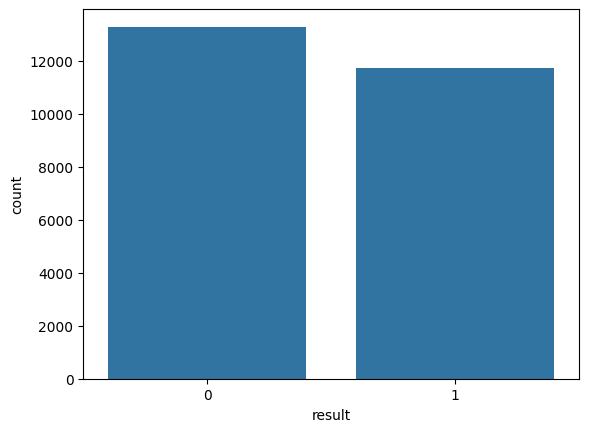

In [20]:
# Now visualize the data
sns.countplot(x=delivery_df['result'])
plt.show()


In [21]:
# Selecting relevant features for score prediction
features = ['batting_team', 'bowling_team', 'city ', 'over', 'balls_left', 'wickets_left', 'cur_run_rate']
target = 'total-runs_y'  # Target variable for score prediction

data = delivery_df[features + [target]].dropna()

In [22]:
# Splitting data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Preprocessing: Encoding categorical variables and scaling numerical ones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['over', 'balls_left', 'wickets_left', 'cur_run_rate']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['batting_team', 'bowling_team', 'city '])
    ])


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create Gradient Boosting Regressor pipeline
gb_regressor = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

# Train the Gradient Boosting Regressor
gb_regressor.fit(X_train, y_train)


# Evaluate the Gradient Boosting Regressor
gb_predictions = gb_regressor.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_predictions)
print(f"Gradient Boosting Regressor MAE: {gb_mae}")

# Save the trained regression model
with open('score.pkl', 'wb') as file:
    pickle.dump(gb_regressor, file)

1.6.1
Gradient Boosting Regressor MAE: 1.2163653826577665
